In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d
from imageio.v2 import imread

## Manual 2D Convolution

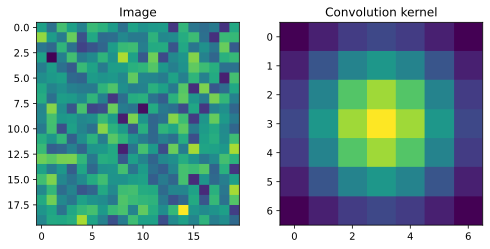

In [10]:
# Create sample image
imgN = 20
image = np.random.randn(imgN, imgN)

# 2D Gaussian convolution kernel
kernelN = 7
Y, X = np.meshgrid(np.linspace(-3, 3, kernelN), np.linspace(-3, 3, kernelN))
kernel = np.exp( -(X**2+Y**2)/7)

# Plot the image and kernel
fig, ax = plt.subplots(1, 2, figsize=(8,6))
ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

plt.show()

In [11]:
# Perform convolution
convo_output = convolve2d(image, kernel, mode='valid')


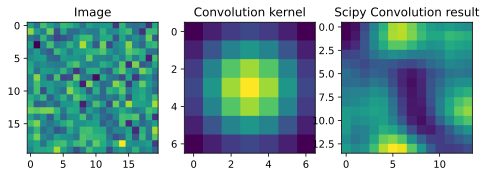

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(8,8))

ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

ax[2].imshow(convo_output)
ax[2].set_title('Scipy Convolution result')

plt.show()

## Test with real image

In [27]:
# Fetch sample image from web
img = imread('https://upload.wikimedia.org/wikipedia/commons/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg')
print(img.shape)

img = np.mean(img, axis=2)
img = img/np.max(img)
print(img.shape)

(4830, 2900, 3)
(4830, 2900)


In [28]:
# Create 2 sample kernels
VK = np.array([ [1, 0,-1],
                [1, 0,-1],
                [1, 0,-1] ])

HK = np.array([ [1, 1, 1],
                [0, 0, 0],
                [-1,-1,-1] ])

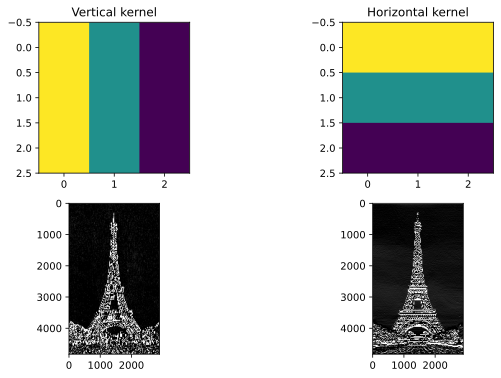

In [29]:
# Compute convolutions
convo_result_1 = convolve2d(img, VK, mode='same')
convo_result_2 = convolve2d(img, HK, mode='same')

# Plot results
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].imshow(VK)
ax[0, 0].set_title('Vertical kernel')

ax[0, 1].imshow(HK)
ax[0, 1].set_title('Horizontal kernel')

ax[1, 0].imshow(convo_result_1, cmap='gray', vmin=0, vmax=.01)
ax[1, 1].imshow(convo_result_2, cmap='gray', vmin=0, vmax=.01)

plt.show()


## PyToch Implementation

In [30]:
import torch
import torch.nn.functional as F

In [31]:
VK_t = torch.tensor(VK).view(1, 1, 3, 3).double()
HK_t = torch.tensor(HK).view(1, 1, 3, 3).double()
img_t = torch.tensor(img).view(1, 1, img.shape[0], img.shape[1])

print(VK_t.shape)
print(img_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 4830, 2900])


In [34]:
conv_1 = F.conv2d(img_t, VK_t)
print(conv_1.shape)

conv_2 = F.conv2d(img_t, HK_t)
print(conv_2.shape)

torch.Size([1, 1, 4828, 2898])
torch.Size([1, 1, 4828, 2898])


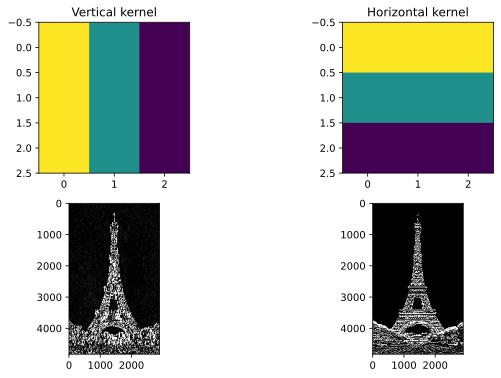

In [35]:
# Plot results
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].imshow(VK)
ax[0, 0].set_title('Vertical kernel')

ax[0, 1].imshow(HK)
ax[0, 1].set_title('Horizontal kernel')

img1 = torch.squeeze(conv_1.detach())
ax[1, 0].imshow(img1, cmap='gray', vmin=0, vmax=.01)
img2 = torch.squeeze(conv_2.detach())
ax[1, 1].imshow(img2, cmap='gray', vmin=0, vmax=.01)

plt.show()

# Test using the Conv2 PyTorch class

In [36]:
import torch.nn as nn

In [37]:
# Create a conv2d class instance

in_channels = 3 # RGB values
out_channels = 15
kernel_size = 5
stride = 1
padding = 0

c = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
print(c)

print(f'Size of weights: {c.weight.shape}')
print(f'Size of bias: {c.bias.shape}')


Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


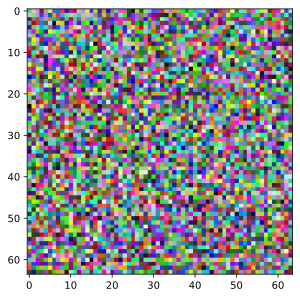

In [38]:
# Convolve with an image
img_size = (1, 3, 64, 64)
img = torch.rand(img_size)

# Permutate tensors to match matplotlib format 
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))

In [40]:
conv_result = c(img)

print(img.shape)
print(conv_result.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


## Practice Problems

In [47]:
'''
Convolve an image of size 1x256x256 to create a 1x252x84 result
'''

# Convolution params
in_channels = 1
out_channels = 1
img_size = [256, 256]
kernel_size = 7
stride = (1, 3)
padding = 1

c = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

# Generate sample input image
img = torch.rand(1, in_channels, img_size[0], img_size[1])

# Run convolution
img_output = c(img)
emp_size = torch.squeeze(img_output).shape

# Compute size of resulting image 
expected_size = np.array([out_channels, 0, 0], dtype=int)
expected_size[1] = np.floor((img_size[0] + 2 * padding - kernel_size) / stride[0]) + 1
expected_size[2] = np.floor((img_size[1] + 2 * padding - kernel_size) / stride[1]) + 1

# Compare expected vs actual
print(f'Expected size: {expected_size}')
print(f'Actual size: {list(emp_size)}')


Expected size: [  1 252  84]
Actual size: [252, 84]


In [63]:
'''
Convolve an image of size 3x64x64 to create a 10x28x28 result
'''

# Convolution params
in_channels = 3
out_channels = 10
img_size = [64, 64]
kernel_size = 9
stride = (2,2)
padding = 0

c = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

# Generate sample input image
img = torch.rand(1, in_channels, img_size[0], img_size[1])

# Run convolution
img_output = c(img)
emp_size = torch.squeeze(img_output).shape

# Compute size of resulting image 
expected_size = np.array([out_channels, 0, 0], dtype=int)
expected_size[1] = np.floor((img_size[0] + 2 * padding - kernel_size) / stride[0]) + 1
expected_size[2] = np.floor((img_size[1] + 2 * padding - kernel_size) / stride[1]) + 1

# Compare expected vs actual
print(f'Expected size: {expected_size}')
print(f'Actual size: {list(emp_size)}')

Expected size: [10 28 28]
Actual size: [10, 28, 28]


In [64]:
'''
Convolve an image of size 3x224x224 to create a 64x224x224 result
'''

# Convolution params
in_channels = 3
out_channels = 64
img_size = [224, 224]
kernel_size = 9
stride = (1,1)
padding = 5

c = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

# Generate sample input image
img = torch.rand(1, in_channels, img_size[0], img_size[1])

# Run convolution
img_output = c(img)
emp_size = torch.squeeze(img_output).shape

# Compute size of resulting image 
expected_size = np.array([out_channels, 0, 0], dtype=int)
expected_size[1] = np.floor((img_size[0] + 2 * padding - kernel_size) / stride[0]) + 1
expected_size[2] = np.floor((img_size[1] + 2 * padding - kernel_size) / stride[1]) + 1

# Compare expected vs actual
print(f'Expected size: {expected_size}')
print(f'Actual size: {list(emp_size)}')

Expected size: [ 64 226 226]
Actual size: [64, 226, 226]


In [75]:
'''
Convolve an image of size 3x196x96 to create a 5x66x49 result
'''

# Convolution params
in_channels = 3
out_channels = 5
img_size = [196, 96]
kernel_size = (3, 2)
stride = (3,2)
padding = 1

c = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

# Generate sample input image
img = torch.rand(1, in_channels, img_size[0], img_size[1])

# Run convolution
img_output = c(img)
emp_size = torch.squeeze(img_output).shape

# Compute size of resulting image 
expected_size = np.array([out_channels, 0, 0], dtype=int)
expected_size[1] = np.floor((img_size[0] + 2 * padding - kernel_size[0]) / stride[0]) + 1
expected_size[2] = np.floor((img_size[1] + 2 * padding - kernel_size[1]) / stride[1]) + 1

# Compare expected vs actual
print(f'Expected size: {expected_size}')
print(f'Actual size: {list(emp_size)}')

Expected size: [ 5 66 49]
Actual size: [5, 66, 49]


## Transpose Convolution

In [76]:
# Sample params
in_channels = 3
out_channels = 15
kernel_size = 5
stride = 1
padding = 0

# Create instance of 2D transpose convolution
c = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding)
print(c)

print(f'Size of weights: {str(c.weight.shape)}')
print(f'Size of bias: {str(c.bias.shape)}')

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


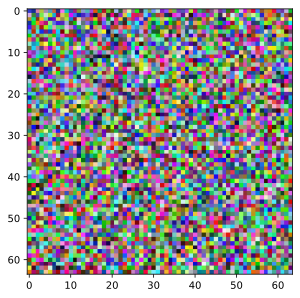

In [77]:
# Convolve with image
img_size = (1, 3, 64, 64)
img = torch.rand(img_size)

img2view = img.permute(2, 3, 1, 0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))

In [78]:
conv_result = c(img)

print(img.shape)
print(conv_result.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])
